In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [142]:
df = pd.read_excel('Date_Fruit_Datasets.xlsx', 'Date_Fruit_Datasets')

In [143]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [144]:
values = df.iloc[:, -1].unique()
values

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

In [145]:
df['Class'] = df['Class'].replace((values), ([i for i in range(len(values))]))
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,0
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,0
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,0
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,0
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,0


In [146]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
scaler = StandardScaler()
X = np.array(scaler.fit_transform(X))
df = np.c_[X, y]
df = pd.DataFrame(df)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.155640,0.783942,0.604507,1.311643,-1.129568,1.075704,0.708628,1.108752,0.871873,-0.046797,...,-0.349683,-0.575281,0.218565,-1.342811,-1.267269,-0.822728,0.538340,0.435593,-0.023908,0.0
1,0.371700,0.067067,-0.187473,0.869789,-1.899771,0.431437,0.857410,0.323373,0.804852,-0.051373,...,-0.562154,-0.661407,-0.298009,-0.117030,-0.493225,-0.253422,-0.003550,0.284113,-0.024694,0.0
2,2.132265,1.439131,1.319121,1.921899,-0.993119,1.794103,0.791285,2.069149,0.547942,-0.045820,...,-0.171667,-0.333868,0.457986,-3.049848,-2.670541,-2.197277,0.958897,0.742335,0.355243,0.0
3,1.098729,0.716350,0.535970,1.308399,-1.250230,1.031228,0.714138,1.051992,0.737832,-0.047612,...,0.274066,0.935707,2.187189,-0.011006,-0.177706,-0.125142,-0.416894,-0.331475,-0.639369,0.0
4,0.459641,0.250603,0.091511,0.761463,-1.025822,0.507425,0.493720,0.431717,0.384115,-0.046056,...,-0.534895,-0.570286,0.309306,-0.399329,-0.406627,0.143293,0.167646,0.148910,-0.502579,0.0


In [147]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

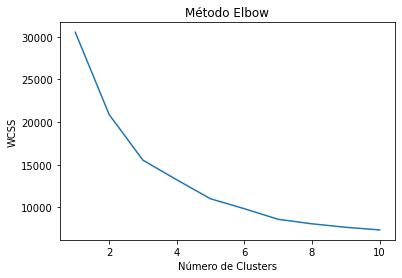

In [148]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 1000).fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [150]:
pca = PCA(2)
data = np.c_[X_train, y_train]
data = pca.fit_transform(data)

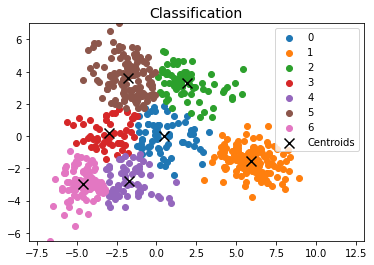

In [151]:
kmeans = KMeans(n_clusters = 7, max_iter = 1000).fit(data)
label = kmeans.labels_
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1], label = i)
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'k', marker = 'x', s = 100, label = 'Centroids')
plt.title('Classification', fontsize = 14)
plt.axis([-8, 13, -6.5, 7])
plt.legend()
plt.show()

In [152]:
data_test = np.c_[X_test, y_test]
data_test = pca.fit_transform(data_test)

In [153]:
label_test = kmeans.predict(data_test)

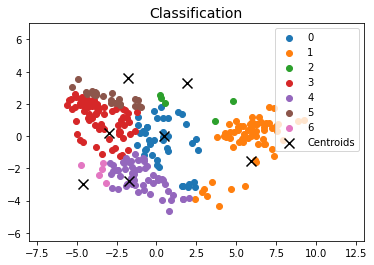

In [154]:
u_labels_test = np.unique(label_test)

for i in u_labels_test:
    plt.scatter(data_test[label_test == i , 0] , data_test[label_test == i , 1], label = i)
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'k', marker = 'x', s = 100, label = 'Centroids')
plt.title('Classification', fontsize = 14)
plt.axis([-8, 13, -6.5, 7])
plt.legend()
plt.show()